<a href="https://colab.research.google.com/github/rahule-1999/DDA-python/blob/main/Week_3/Module_3_2_Tabular_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


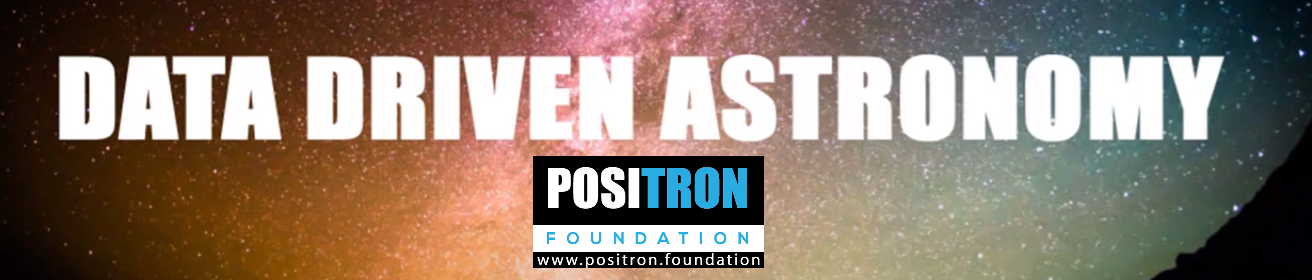




In [1]:
!git clone https://github.com/Jack3690/DDA

Cloning into 'DDA'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 425 (delta 106), reused 37 (delta 37), pack-reused 271
Receiving objects: 100% (425/425), 51.18 MiB | 20.60 MiB/s, done.
Resolving deltas: 100% (216/216), done.


In [2]:
cd DDA/Week_3/data

/content/DDA/Week_3/data


# **Packages**

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import requests

from astropy.cosmology import WMAP9 as cosmo
from astropy.modeling import models, fitting
import astropy.units as u
from  astropy.coordinates import Distance

import sys
if sys.version_info.major == 2:
    from cStringIO import StringIO as stringio
else:
    from io import StringIO as stringio
    from io import BytesIO as bytesio
# To improve Aesthetics of plots

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15
sb.set_style('darkgrid')

# **SDSS**

The Sloan Digital Sky Survey has created the most detailed three-dimensional maps of the Universe ever made, with deep multi-color images of one third of the sky, and spectra for more than three million astronomical objects

In [4]:
df = pd.read_csv('sdss.csv')

In [5]:
df

,Unnamed: 0,specObjID,ra,dec,u,g,r,i,z,redshift,velDisp,velDispErr,p_el,p_cw,p_acw,p_el_debiased,p_cs_debiased,spiral,elliptical,p_edge
0,0,376196287613134848,187.49951,-1.207700,20.29487,18.55173,17.66422,17.29273,16.94767,0.081349,113.85850,8.776383,0.615,0.000,0.154,0.360,0.574,1,0,0.179
1,1,350212348444698624,227.22447,-1.248677,20.25697,18.30546,17.35451,16.85212,16.47298,0.055359,64.30567,10.108580,0.296,0.000,0.000,0.082,0.918,1,0,0.704
2,2,350188159188887552,227.52563,-1.198828,20.83169,18.43248,17.28618,16.68097,16.22799,0.070866,85.56054,12.952710,0.227,0.000,0.023,0.050,0.923,1,0,0.727
3,3,351349518748379136,228.80054,-1.120184,19.48937,17.79753,16.77446,16.26573,15.84888,0.144341,208.70760,16.857760,0.138,0.759,0.000,0.138,0.828,1,0,0.069
4,4,351317907789080576,229.19920,-1.074916,20.23455,18.08716,16.81892,16.24334,15.74895,0.126824,212.11040,7.915750,0.136,0.045,0.023,0.059,0.917,1,0,0.773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,346793966743611392,222.72888,-0.368997,19.31546,18.10183,17.61527,17.37420,17.11073,0.026770,46.89219,33.563560,0.000,0.000,0.000,0.000,1.000,1,0,1.000
3995,3996,346798914545936384,222.81485,-0.372144,18.30437,17.21040,16.79350,16.53516,16.35629,0.043397,78.39342,24.353800,0.036,0.107,0.000,0.011,0.953,1,0,0.821
3996,3997,346798089912215552,222.84265,-0.375582,19.29866,17.58079,16.76517,16.34474,16.00443,0.043435,98.48522,6.102726,0.207,0.000,0.276,0.186,0.814,1,0,0.517
3997,3998,346783246505240576,223.06694,-0.293633,17.26306,15.41430,14.56262,14.15804,13.82424,0.043382,191.14090,4.608268,0.943,0.000,0.000,0.943,0.000,0,1,0.000


In [6]:
df.describe()

,Unnamed: 0,specObjID,ra,dec,u,g,r,i,z,redshift,velDisp,velDispErr,p_el,p_cw,p_acw,p_el_debiased,p_cs_debiased,spiral,elliptical,p_edge
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,1999.044761,3.926539e+17,169.655660,9.902309,19.367115,17.667242,16.778575,16.341868,16.022724,0.104359,143.594185,12.855976,0.450099,0.119309,0.122364,0.324631,0.636903,0.735434,0.264566,0.274505
std,1154.630276,1.678063e+17,61.769101,21.613074,1.035049,0.907333,0.839042,0.826925,0.833287,0.049602,63.899683,7.530527,0.335768,0.245378,0.245856,0.361847,0.370135,0.441157,0.441157,0.281868
min,0.000000,3.006161e+17,8.334307,-3.746345,15.166800,13.469480,12.640760,12.124880,11.677370,0.010920,12.581060,2.039783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,999.500000,3.130347e+17,152.463400,-1.729090,18.761815,17.187835,16.362485,15.930270,15.613425,0.071604,96.961235,8.546898,0.143000,0.000000,0.000000,0.041000,0.152500,0.000000,0.000000,0.032000
50%,1999.000000,3.727570e+17,176.371910,-0.178507,19.450760,17.859080,16.996660,16.559930,16.232270,0.095371,135.714000,11.412280,0.385000,0.016000,0.022000,0.131000,0.818000,1.000000,0.000000,0.179000
75%,2998.500000,3.975198e+17,195.783280,1.102221,20.064515,18.314015,17.404035,16.948110,16.627435,0.129405,184.978050,15.253150,0.829000,0.067000,0.078000,0.797500,0.926000,1.000000,1.000000,0.455000
max,3999.000000,1.955862e+18,359.607790,66.681921,25.739800,19.696900,18.369020,17.878810,17.547630,0.317113,460.933200,150.515300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**Distance Modulus**

$m_f-M_f = 5logd -5$

where

$m_f$ : Apparent magnitude for a filter f

$M_f$ : Absolute magnitude for any filter f

d     : Distance in parsecs(pc)

When d is in Mpc

$m_f-M_f = 5log10^6d +25$

Thus

$M_f = m_f - 5logd -25$


First let's find [luminosity distance](https://en.wikipedia.org/wiki/Luminosity_distance) of the source by cosmo.luminosity_distance function which takes redshift; df['redshift'] as input.

In [7]:
df['dist'] = cosmo.luminosity_distance(z=df['redshift']).value

In [9]:
# Absolute magnitude for SDSS bands

df['M_u']=df['u'] - 5*np.log10(df['dist']) -25

# Complete the code for rest of the bands
df['M_g']=df['g'] - 5*np.log10(df['dist']) -25
df['M_r']=df['r'] - 5*np.log10(df['dist']) -25
df['M_i']=df['i'] - 5*np.log10(df['dist']) -25
df['M_z']=df['z'] - 5*np.log10(df['dist']) -25

#**Colors**

If astronomers are going to learn anything from star color, they first need to have a definition of color that everyone can agree on; a measurement that everyone can make to compare the colors of different stars. The measurement they chose is the one you found in the last section: color is the difference in magnitude between two filters.

Color is symbolized by subtracting the magnitudes: u-g, g-r, r-i, and so on. Remember that all these quantities involve magnitude, so they decrease with increasing light output. A star with a high g-r color is redder than a star with a low g-r color.

**Exercise 6.1.a**

Write code for making colors columns for SDSS 'u', 'g', 'r', 'i', and 'z' filters 

In [10]:
df['u-g'] = df['u']-df['g']
# Complete the code
df['g-r'] = df['g']-df['r']
df['r-i'] = df['r']-df['i']
df['i-z'] = df['i']-df['z']

In [11]:
df.describe()[['u-g','g-r','r-i','i-z']]

,u-g,g-r,r-i,i-z
count,3999.000000,3999.000000,3999.000000,3999.000000
mean,1.699873,0.888667,0.436707,0.319144
std,0.361675,0.235115,0.068927,0.075197
min,0.781920,0.230600,-0.247980,-0.075280
25%,1.414530,0.738740,0.400060,0.282310
50%,1.738170,0.890110,0.438900,0.332550
75%,1.953975,1.018700,0.480550,0.366985
max,6.352550,1.872940,0.669240,1.089040


'u-g' has higher max

'r-i' has lowest min

Let's use bin width = 0.1

Code for plotting SDSS colors of sources in our sample

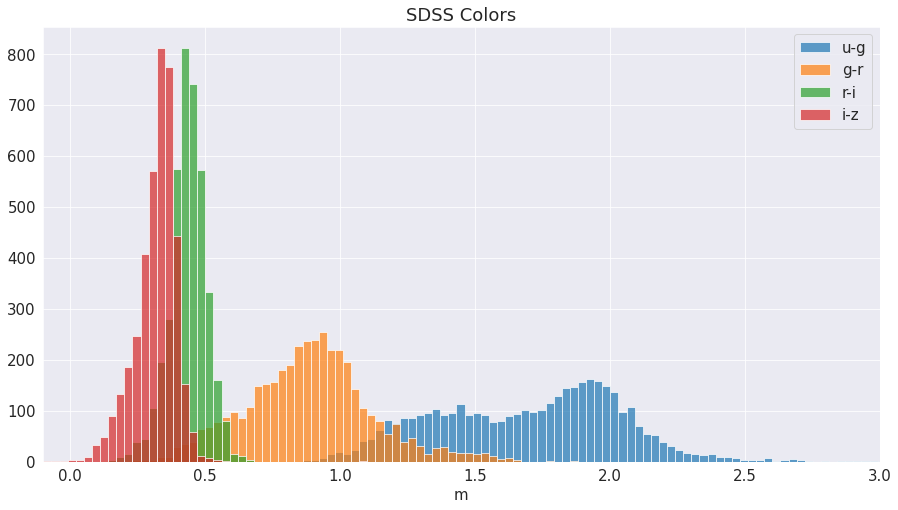

In [12]:
bin_min = df['r-i'].min()
bin_max = df['u-g'].max()
bin_width = 0.03

bins = np.arange(bin_min, bin_max, bin_width)

plt.figure(figsize = (15,8))

plt.hist(df['u-g'], bins = bins, alpha = 0.7)
plt.hist(df['g-r'], bins = bins, alpha = 0.7)
plt.hist(df['r-i'], bins = bins, alpha = 0.7)
plt.hist(df['i-z'], bins = bins, alpha = 0.7)

plt.legend(['u-g','g-r','r-i','i-z'])
plt.xlim(-0.1,3)
plt.title('SDSS Colors')
plt.xlabel('m');

**Exercise 6.1.a**
Write code for creating subsample of spirals and elliptical using 'spiral' and 'elliptical'

In [13]:
df_S = df[df['spiral']==1]
# Complete the code
df_E = df[df['elliptical']==1]

Make number of samples in both sub sample same

In [16]:
len(df_S), len(df_E)

(1058, 1058)

In [17]:
df_S = df_S[:1058]

**Exercise 6.1.b**

Write code for plotting color distribution of Spiral galaxies in our sample


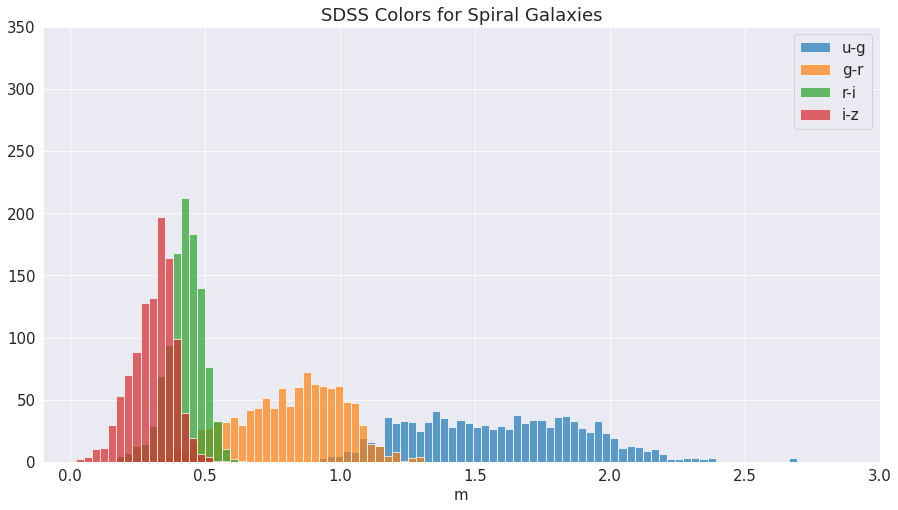

In [18]:
bin_min = df['r-i'].min()
bin_max = df['u-g'].max()
bin_width = 0.03

# Complete the code
bins = np.arange(bin_min, bin_max, bin_width)

plt.figure(figsize = (15,8))


plt.hist(df_S['u-g'], bins = bins, alpha = 0.7)
# Complete the code for rest of the colors
plt.hist(df_S['g-r'], bins = bins, alpha = 0.7)
plt.hist(df_S['r-i'], bins = bins, alpha = 0.7)
plt.hist(df_S['i-z'], bins = bins, alpha = 0.7)


plt.legend(['u-g','g-r','r-i','i-z'])
plt.xlim(-0.1,3)
plt.ylim(0, 350)
plt.title('SDSS Colors for Spiral Galaxies')
plt.xlabel('m');

**Exercise 6.1.c**

Write code for plotting color distribution of Elliptical galaxies in our sample

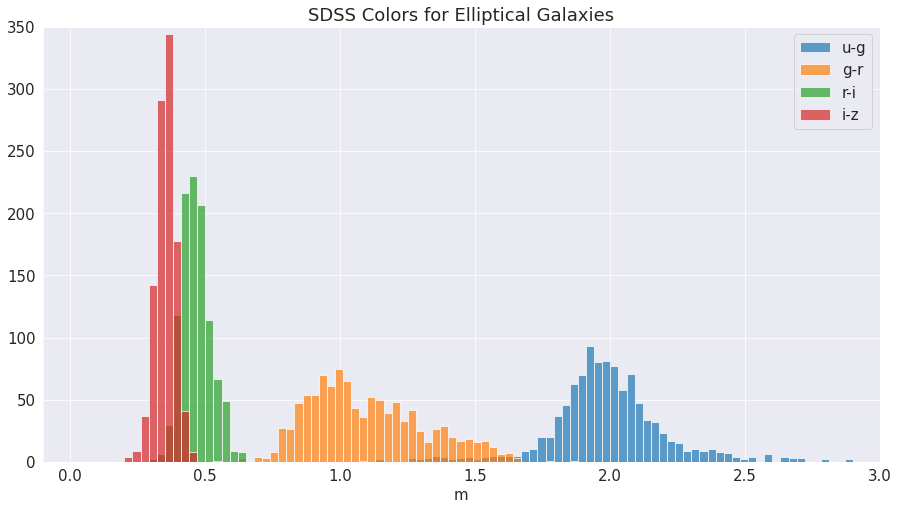

In [20]:
bin_min = df['r-i'].min()
bin_max = df['u-g'].max()
bin_width = 0.03

bins = np.arange(bin_min, bin_max, bin_width)

plt.figure(figsize = (15,8))


plt.hist(df_E['u-g'], bins = bins, alpha = 0.7)
# Complete the code for rest of the colors
plt.hist(df_E['g-r'], bins = bins, alpha = 0.7)
plt.hist(df_E['r-i'], bins = bins, alpha = 0.7)
plt.hist(df_E['i-z'], bins = bins, alpha = 0.7)


plt.legend(['u-g','g-r','r-i','i-z'])
plt.xlim(-0.1,3)
plt.ylim(0, 350)
plt.title('SDSS Colors for Elliptical Galaxies')
plt.xlabel('m');



We observe that Elliptical galaxies are redder than than their Spiral counter parts

#**Faber-Jackson Relation**

The Faber–Jackson relation provided the first empirical power-law relation between the luminosity L and the central stellar velocity dispersion $\sigma$  of elliptical galaxy, and was presented by the astronomers Sandra M. Faber and Robert Earl Jackson in 1976. [Learn more](https://en.wikipedia.org/wiki/Faber%E2%80%93Jackson_relation)

Let's plot 'velDisp' vs 'M_i'  galaxies for Spiral galaxies

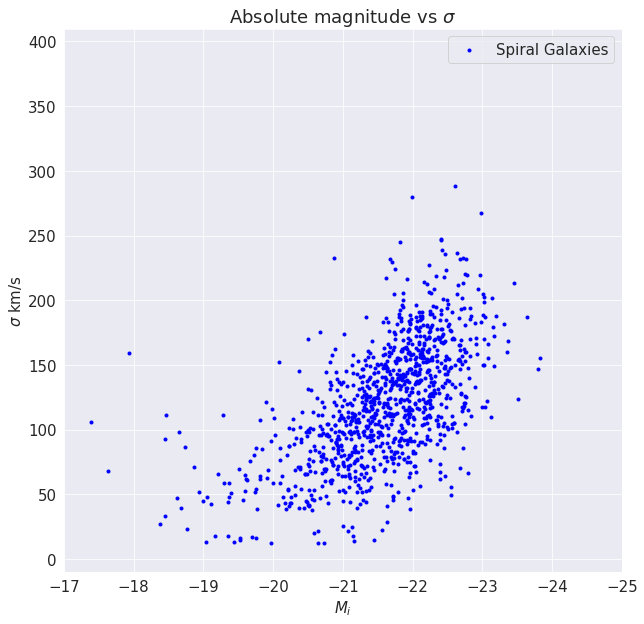

In [21]:
x = df_S['M_i']
y = df_S['velDisp']
yerr = df_S['velDispErr']

plt.scatter(x,y,marker='.',color ='blue')

plt.xlim(-17,-25)
plt.ylim(-10,410)
plt.title(r'Absolute magnitude vs $\sigma$')
plt.xlabel(r'$M_i$')
plt.ylabel(r'$\sigma$ km/s')
plt.legend(['Spiral Galaxies'])

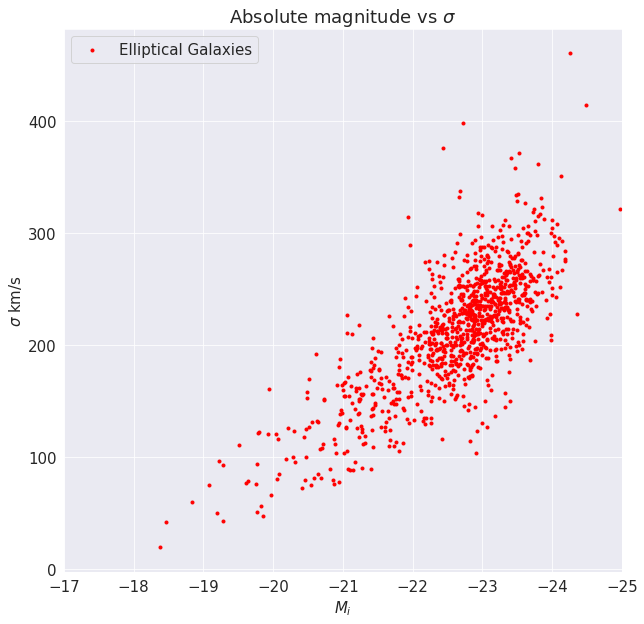

In [22]:
x = df_E['M_i']
y = df_E['velDisp']
yerr = df_E['velDispErr']

plt.scatter(x,y, marker ='.',color ='red')
plt.xlim(-17,-25)
plt.title(r'Absolute magnitude vs $\sigma$')
plt.xlabel(r'$M_i$')
plt.ylabel(r'$\sigma$ km/s')
plt.legend(['Elliptical Galaxies'])

We observe that there is a strong linear correlation between velocity dispersion and absolute magnitude of elliptical galaxy

**Exercise 6.2**

Using astropy, fit a Linear1D() model using LinearLSQFitter with x : absolute magnitude, y : velocity dispersion for elliptical galaxies. For reference use Module 1.2.

In [ ]:
# Inititalize model. # Linear1D
init = 
# Get fitting function. LinearLSQFitter()
fit = 
# Fit the model
model = fit(init,x,y, weights=1.0/(yerr))

model

Write code for generating the plot given below

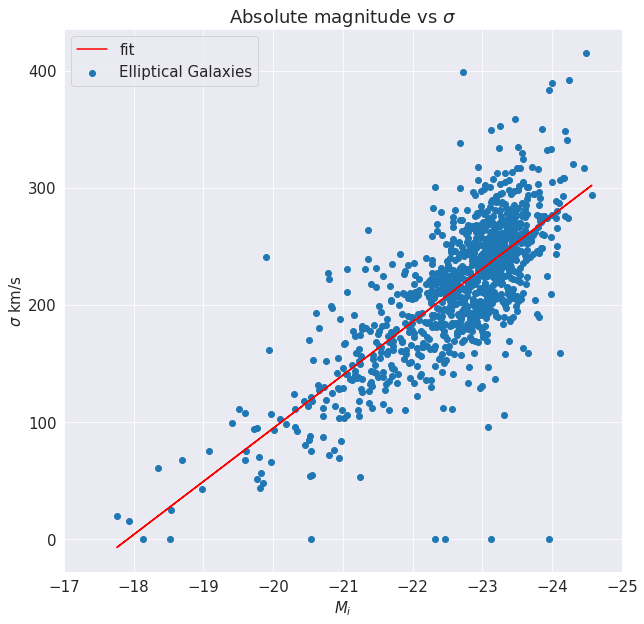

In [ ]:
# Code for getting above plot
x = 
y = 

#**Galaxy Zoo 2**

Galaxy Zoo 2 (GZ2) is a citizen science project with more than 16 million morphological classifications of 304,122 galaxies drawn from the Sloan Digital Sky Survey. Morphology is a powerful probe for quantifying a galaxy's dynamical history; however, automatic classifications of morphology (either by computer analysis of images or by using other physical parameters as proxies) still have drawbacks when compared to visual inspection. The large number of images available in current surveys makes visual inspection of each galaxy impractical for individual astronomers. GZ2 uses classifications from volunteer citizen scientists to measure morphologies for all galaxies in the DR7 Legacy survey with m_r>17, in addition to deeper images from SDSS Stripe 82. [Learn more](https://arxiv.org/abs/1308.3496). [Datamodel](http://gz2hart.s3.amazonaws.com/gz2_hart16.txt)

We will be using this data set for Group Activity later

In [ ]:
import gzip

In [ ]:
# Downloading gzip file from url

url = "http://gz2hart.s3.amazonaws.com/gz2_hart16.csv.gz"

response = requests.get(url, stream=True)

content = bytesio(response.content)

with gzip.open(content, 'rt') as read_file:
    df = pd.read_csv(read_file)

In [ ]:
df

#**Stripe 82**

[Stripe 82](https://en.wikipedia.org/wiki/Stripe_82) is a 300 deg2 equatorial field of sky that was imaged multiple times by the Sloan Digital Sky Survey from 2000 to 2008.[1] It approximately covers the region with right ascension from 20:00h to 4:00h and declination from -1.26° to +1.26°.

Write code for limiting sample to 'sample'= stripe82

In [ ]:
# Complete the code
df_s82 = 

In [ ]:
len(df_s82)

Write code for plotting distribution of Stripe82 sources on the sky plane

In [ ]:
x = 
y = 

#**Two point Correlation Function**

The two-point autocorrelation function is a function of one variable (distance); it describes the excess probability of finding two galaxies separated by this distance. In astronomy, [a correlation function](https://en.wikipedia.org/wiki/Correlation_function_(astronomy)) describes the distribution of galaxies in the universe. By default, "correlation function" refers to the two-point autocorrelation function. 

In [ ]:
!pip install astroML --quiet

     |████████████████████████████████| 105 kB 14.4 MB/s 


In [ ]:
from astroML.correlation import bootstrap_two_point_angular

In [ ]:
bins = 10 ** np.linspace(np.log10(1/60.), np.log10(10), 50)

# bootstrap_two_point_angular with method = "landy-szalay",random_state=3,Nbootstraps=10 and bins = bins above
corr = bootstrap_two_point_angular(df_s82['ra'],df_s82['dec'],method = "landy-szalay",bins=bins,random_state=3,Nbootstraps=10)

bin_centers = 0.5 * (bins[1:] + bins[:-1])

x    = bin_centers
y    = corr[0]
yerr = corr[1]

# Plotting the results
plt.figure(figsize=(10,8))
plt.errorbar(x,y,yerr,fmt=".k", ecolor='gray', lw=1,capsize=3)
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta$')
plt.legend(['Galaxies','Error'])


In [ ]:
# Let's fit a curve to the above data. 
from astropy.modeling.models import custom_model

# User defined function
@custom_model
def new_model(x,a=1,b=1,c=0):
  return a*np.exp(b*x**c)

# Inititalize model. new_model)
init = new_model()

# Get fitting function. LevMarLSQFitter()
fit= fitting.LevMarLSQFitter()

x    = bin_centers
y    = corr[0]
yerr = corr[1]

# Fit the model.
model = fit(init,x,y,weights=1.0/yerr)
model

In [ ]:
plt.plot(x,model(x))
plt.errorbar(x,y,yerr,fmt=".k", ecolor='gray', lw=1,capsize=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta$')

**Exercise 6.3**

Write code for creating a sample of barred galaxies which are not edge-on using 't03_bar_a06_bar_weighted_fraction'>0.5 and 't02_edgeon_a05_no_weighted_fraction'>0.5 from Galaxy zoo 2 catalog and perform two point correlation. 

In [ ]:
df_bar = 

In [ ]:
len(df_bar) 

In [ ]:
bins = 10 ** np.linspace(np.log10(1/60.), np.log10(10), 50)

#bootstrap_two_point_angular with method = "landy-szalay",random_state=3,Nbootstraps=10 and bins = bins above
corr = 

bin_centers = 

x    = 
y    = 
yerr = 

# Plot the results



Fit a line to the above data and plot the data and fit

In [ ]:
# Intialize with new_model difned earlier
init = 
# Get fitting function. LevMarLSQFitter()
fit = 

x    =
y    = 
yerr = 

# Fit the model.
model = 
model

In [ ]:
# Plot data with error bar. Plot fitted data


#**Nearest Neighbour**

In this section we find nearest neighbhour for sources within a threshold. We will be using angular distance as the metric

Write function for calculating angular distance between two points in Equatorial coordinates.

Distance between two points ( $RA_1$, $DEC_1$) and ( $RA_2$, $DEC_2$) is given by


$\theta = \cos^{-1}\left[\sin(DEC_1)\sin(DEC_2) +\cos(DEC_1)\cos(DEC_2)cos(RA_2-RA_1)\right]$

In [ ]:
w=np.pi/180
def ang_dist(RA1,DEC1,RA2,DEC2):
  # Hint remember RA1,DEC1,RA2,DEC2 are in degrees. Convert to radian using w
  cos_theta = 
  return np.arccos(cos_theta)/w  # degrees

Nearest neighbour of galaxies of first 1000 galaxies in the Stripe 82 region of Galaxy Zoo 2 catalog

In [ ]:
crossmatch = [] # To store objid of sources
not_crossmatch = df_s82[0:0]
threshold = 10/60 # 10 arcminutes

for i,row1 in df_s82[:1000].iterrows():

  RA1  = row1['ra']
  DEC1 = row1['dec']

  # Initializing
  min = threshold    
  nn = i   

  # Make RA and DEC cut based on threshold.
  df_temp = df_s82[ (abs(df_s82['ra']-RA1) < threshold) & (abs(df_s82['dec']-DEC1) < threshold) ]

  for j,row2 in df_temp.iterrows():
    if(row1['dr7objid'] != row2['dr7objid']): # For avoiding self reference
      RA2  = row2['ra']
      DEC2 = row2['dec']
      
      # Angular distance
      d = ang_dist(RA1,DEC1,RA2,DEC2)

       # Check if < threshold. If yes make it new min and new nearest neighbour
      if d< threshold:
          min = d
          nn = j

  if min <threshold:
    # Append row1['dr7objid'] and row2['dr7objid']
    crossmatch.append([row1['dr7objid'],row2['dr7objid']])
  else :
    # Append row1 to not_crossmatch 
    not_crossmatch = not_crossmatch.append(row1)

# The code will take some time to run

In [ ]:
len(crossmatch), len(not_crossmatch)

#**Puzzle VII**

Write code for loading files 'puzzle_VII_cat_I.csv' and 'puzzle_VII_cat_II.csv' into pandas dataframe

In [ ]:
df_cat_I = 
df_cat_II =

In [ ]:
df_cat_I

In [ ]:
df_cat_II

In Astronomy different surveys gather different sets of data of same sources in the sky. Sources studied during an observation cycle is often released as catalogs. Since there will always be small difference in the position measurements, cross-matching is used to find same source across different catalogs.

Use nearest neighbour method to cross-match sources in df_cat_I with df_cat_II. Store non_crossmatched sources in a new DataFrame.

In [ ]:
crossmatch = []
not_crossmatch = df_cat_I[0:0]
threshold = 2 

for i,row1 in df_cat_I.iterrows():
  RA1  = 
  DEC1 = 

  # Initializing
  

  # Make RA and DEC cut based on threshold on df_cat_II.
  df_temp = 

  for j,row2 in df_temp.iterrows():
    RA2  = 
    DEC2 =
    
    # Angular distance
    d = 

    # Check if d < threshold. If yes make it new min and assign new nearest neighbour to nn
   


  if min <threshold:
    # Append row1['objid'] and row2['objid']

  else :
    # Append row1 to not_crossmatch 
    not_crossmatch = 

Write code for plotting distribution of non-crossmatched sources on the sky plane

In [ ]:
x1 = 
y1 = 
plt.scatter(x1,y1)

Write code for loading solution file from Puzzle VI; 'puzzle_6_solution.csv'. Plot sky distribution of both non-crossmatched sources and Puzzle VI solution sources in a single plot

In [ ]:
df_p_vi = 

In [ ]:
# Not_crossmatch
x1 = 
y1 = 
plt.scatter(x1,y1)

# df_p_vi
x2 = 
y2 = 
plt.scatter(x2,y2)

Save figure as 'puzzle_7_solution.png'

In [ ]:
plt.savefig('puzzle_7_solution.png')